In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('../data/titanic/train.csv')

In [9]:
X_train = train.loc[:, ['Sex', 'Pclass']]
X_train = pd.get_dummies(X_train, columns=['Sex', 'Pclass'], drop_first=True)
y_train = train.loc[:, 'Survived']

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [11]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
logreg.coef_

array([[-2.48809433, -0.67634771, -1.7159975 ]])

In [13]:
logreg2 = LogisticRegression(solver='liblinear', multi_class='ovr')

In [14]:
X_train = train.loc[:, ['Sex', 'Survived']]
X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
y_train = train.loc[:, 'Pclass']

In [15]:
logreg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
np.argmax(logreg2.predict_proba(X_train), axis=1)

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,

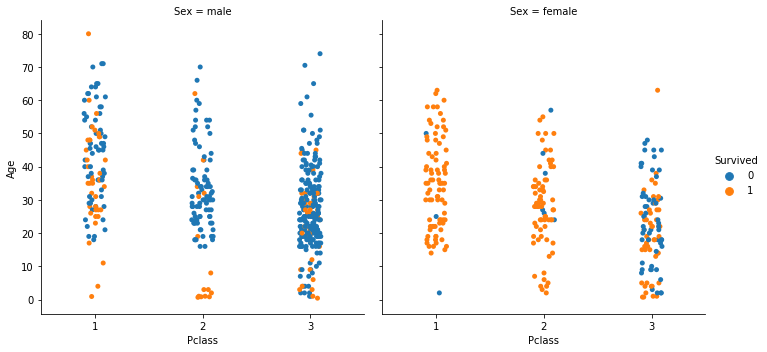

In [22]:
import seaborn as sns

sns.catplot(x='Pclass', y='Age', hue='Survived', col='Sex', data=train);

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [25]:
rf.fit(X_train, y_train)

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
rf.predict_proba(X_train)

array([[0.17814584, 0.19609025, 0.62576391],
       [0.3806466 , 0.31245171, 0.30690168],
       [0.3806466 , 0.31245171, 0.30690168],
       ...,
       [0.0299155 , 0.08702438, 0.88306012],
       [0.41028814, 0.15905862, 0.43065323],
       [0.17814584, 0.19609025, 0.62576391]])

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    'min_samples_leaf': [1, 5, 10, 25],
    'n_estimators': [10, 25, 50, 100]
}

In [33]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10)

In [34]:
grid.fit(X_train, y_train)

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], 'min_samples_leaf': [1, 5, 10, 25], 'n_estimators': [10, 25, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
grid.best_params_

{'max_features': 0.3, 'min_samples_leaf': 5, 'n_estimators': 10}

In [36]:
results = pd.DataFrame(grid.cv_results_)

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\de

In [38]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006251,0.007656,0.003124,0.006248,0.1,1,10,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.483516,0.522222,...,0.574282,0.574282,0.577307,0.568579,0.569116,0.574097,0.569116,0.562889,0.572770,0.005207
1,0.015625,0.000011,0.001562,0.004686,0.1,1,25,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.483516,0.544444,...,0.573034,0.574282,0.577307,0.568579,0.569116,0.574097,0.569116,0.565380,0.572894,0.004751
2,0.028118,0.006250,0.003124,0.006248,0.1,1,50,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.483516,0.544444,...,0.574282,0.574282,0.577307,0.568579,0.569116,0.574097,0.569116,0.565380,0.573019,0.004769
3,0.059369,0.006252,0.006246,0.007649,0.1,1,100,"{'max_features': 0.1, 'min_samples_leaf': 1, '...",0.483516,0.544444,...,0.573034,0.574282,0.577307,0.568579,0.569116,0.574097,0.569116,0.565380,0.572894,0.004751
4,0.004686,0.007158,0.000000,0.000000,0.1,5,10,"{'max_features': 0.1, 'min_samples_leaf': 5, '...",0.483516,0.544444,...,0.573034,0.574282,0.577307,0.568579,0.569116,0.574097,0.569116,0.565380,0.572644,0.004282
